In [1]:
# Tanawat Panitpongsri UID 706306642

# ECON425T Homework 4

## Problem 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as smo
import patsy as pt
import statsmodels.stats.api as sms
from simple_colors import *
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import truncnorm
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.optimize import minimize_scalar
from sklearn.linear_model import LassoCV, RidgeCV

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn import tree  
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [2]:
#read data
df = pd.read_excel("titanic.xls")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
df['male'] = df['sex'].map({'male': 1, 'female': 0})
df = df.drop(['sex', 'name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)

y = df[["survived"]].copy()
X = df.drop("survived", axis = 1)

# Step 1: Identify string columns
string_columns = X.columns[X.dtypes == 'object']

# Step 2: Convert string columns to categorical
for col in string_columns:
    X[col] = pd.Categorical(X[col])

# Step 3: Create dummy columns
X = pd.get_dummies(X, columns=string_columns, prefix=string_columns,drop_first=True)

In [11]:
na_count = X.isnull().sum()
print(na_count)

pclass          0
age           263
sibsp           0
parch           0
fare            1
male            0
embarked_Q      0
embarked_S      0
dtype: int64


In [12]:
X['age'] = X['age'].fillna(X['age'].median())
X['fare'] = X['fare'].fillna(X['fare'].median())

In [13]:
na_count = X.isnull().sum()
print(na_count)

pclass        0
age           0
sibsp         0
parch         0
fare          0
male          0
embarked_Q    0
embarked_S    0
dtype: int64


In [ ]:
### No run -------------
df['male'] = df['sex'].map({'male': 1, 'female': 0})
df['class_1'] = df['pclass'].map(lambda x: 1 if x == 1 else 0)
df['class_2'] = df['pclass'].map(lambda x: 1 if x == 2 else 0)
df['cherbourg'] = df['embarked'].map(lambda x: 1 if x == 'C' else 0)
df['queenstown'] = df['embarked'].map(lambda x: 1 if x == 'Q' else 0)
df = df.drop(['sex', 'pclass', 'embarked', 'name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)
df

In [14]:
# Splitting features and target variable into training and testing sets
x_train = X[:1100]
x_test = X[1100:]

y_train = y[:1100]
y_test = y[1100:]

## (i)

In [22]:
models = {}
for depth in range(1, 9):
    dt = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    models[depth] = {'model': dt, 'accuracy': accuracy}

# Output the models and their accuracies
for depth, info in models.items():
    print(f"Depth: {depth}, Accuracy: {info['accuracy']:.4f}")

Depth: 1, Accuracy: 0.7751
Depth: 2, Accuracy: 0.7273
Depth: 3, Accuracy: 0.8278
Depth: 4, Accuracy: 0.8278
Depth: 5, Accuracy: 0.8182
Depth: 6, Accuracy: 0.8230
Depth: 7, Accuracy: 0.7990
Depth: 8, Accuracy: 0.7943


The decision tree models of depth of 3 and 4 performed the best models in the range up to 8 depth .

## (ii)

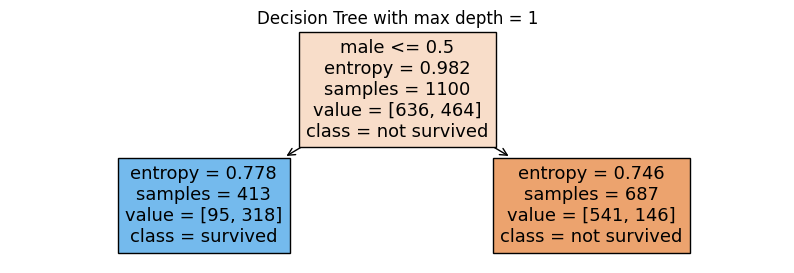

In [37]:
# Decision tree with max depth = 1
plt.figure(figsize=(10, 3))
plot_tree(models[1]['model'], filled=True, feature_names=X.columns, class_names=["not survived", "survived"])
plt.title('Decision Tree with max depth = 1')
plt.show()

From the decision tree depth = 1, the male feature was the most important feature, implying from entropy = 0.982, and used to predict the target variable. Male <= 0.5 indicates the female passengers, while the majority of the class, 318/413, were surviving passengers. On the other branch of the tree, the majority of the males, 541/687, were not surviving passengers.

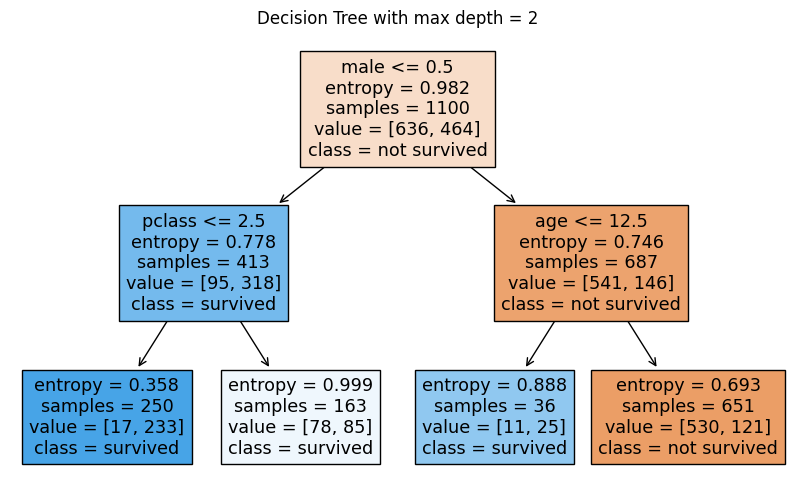

In [38]:
# Decision tree with max depth = 2
plt.figure(figsize=(10, 6))
plot_tree(models[2]['model'], filled=True, feature_names=X.columns, class_names=["not survived", "survived"])
plt.title('Decision Tree with max depth = 2')
plt.show()

From the decision tree depth = 2, the male feature still was the first feature to consider. If the passengers were female, the model predicted that female in 1st and 2nd class priority had higher survival rates compared to the 3rd class priority, 93.2% > 52.1%. On the other branch of the tree, if the passengers were male, their age influenced their survival rate. Boys not being older than 12.5 years had a higher survival rate compared to the olders, 69.4% > 18.6%.

## (iii)

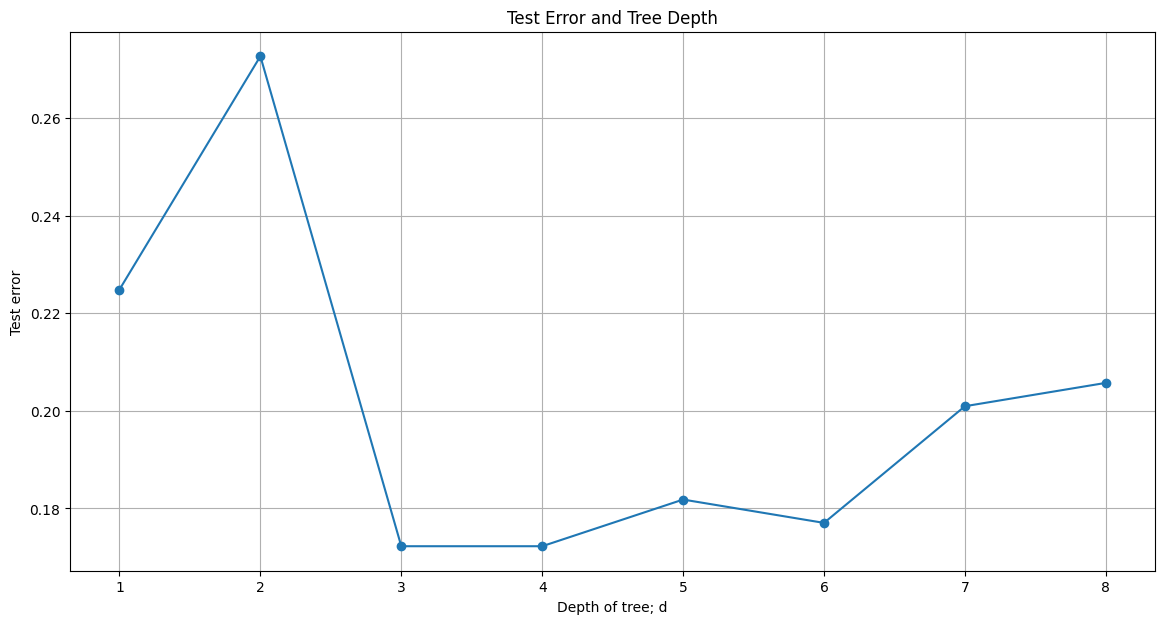

In [32]:
# Gen lists to store depths and the test errors
depths = list(range(1, 9))
test_errors = []

# Calculate test error for each model depth and store
for depth in depths:
    model = models[depth]['model']
    
    y_pred = model.predict(x_test)
    
    # Test error (1 - accuracy)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(test_error)

# Plot the test errors
plt.figure(figsize=(14, 7))
plt.plot(depths, test_errors, marker='o')
plt.title('Test Error and Tree Depth')
plt.xlabel('Depth of tree; d')
plt.ylabel('Test error')
plt.xticks(depths)
plt.grid(True)
plt.show()


From the graph, the test error had a substantial change while adding some depths. The highest test error, in the plot, was 27.27% at depth = 2, while the lowest was 17.22%  at depth =3 and 4. I would choose depth = 3 since it gave the lowest test error as well as the depth = 4 model, but it had less possibility of facing an overfitting issue.